**Predict delivery time using sorting time**

In [ ]:
pip install ml_metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ml-metrics: filename=ml_metrics-0.1.4-py3-none-any.whl size=7845 sha256=d5001a168a70fabbf9f6ce36fa2a24aae43ed29016e0127a86a7f885f42dec14
  Stored in directory: /root/.cache/pip/wheels/56/41/5b/0c6d42b3604a5c823d8922564c4708f84962fa7f2f4facfa6d
Successfully built ml-metrics


In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

In [ ]:
# Loading CVS data into dataframe 

input=pd.read_csv("delivery_time.csv")
input.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
input.rename(columns={'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},inplace=True)
input.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
# Checking the no of rows and column

input.shape

(21, 2)

In [ ]:
# Checking for missing data

input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
input.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


**Checking the distribution and detecting outliers using histogram and boxplot**

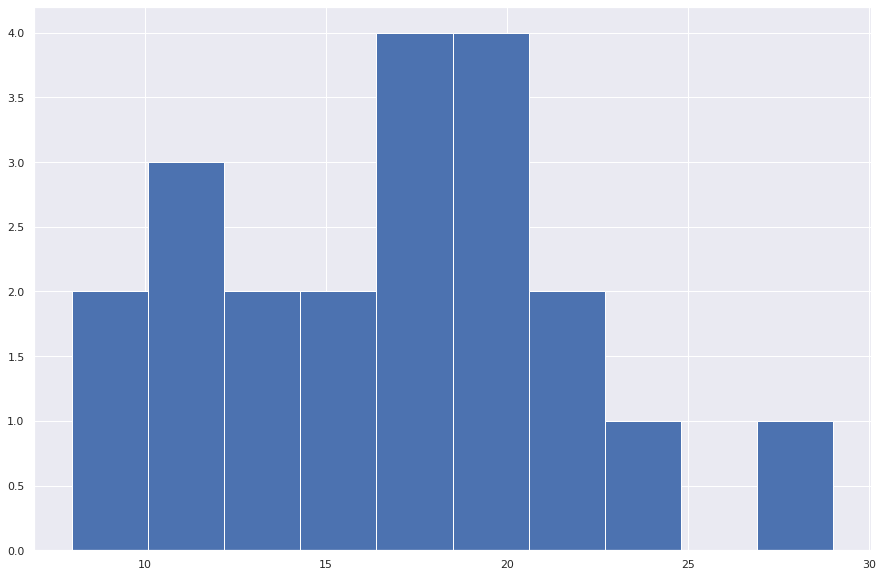

In [ ]:
input['Delivery_Time'].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


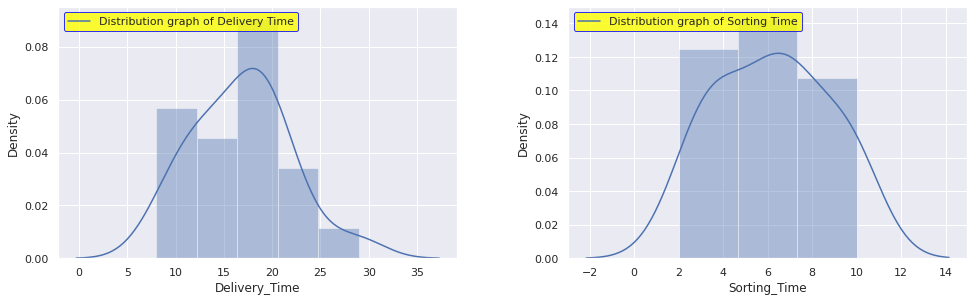

In [ ]:
# Visualizing the distribution using histogram

sns.set(rc={"figure.figsize": (15,10)})

#creating first plot

plt.subplot(2,2,1)
ax = sns.distplot(input['Delivery_Time'])
plt.legend(["Distribution graph of Delivery Time"],loc='upper left',facecolor='yellow',edgecolor='blue')

# Creating the second plot

plt.subplot(2,2,2)
ax = sns.distplot(input['Sorting_Time'])
plt.legend(["Distribution graph of Sorting Time"],loc='upper left',facecolor='yellow',edgecolor='blue')

plt.tight_layout(5) 
plt.show()

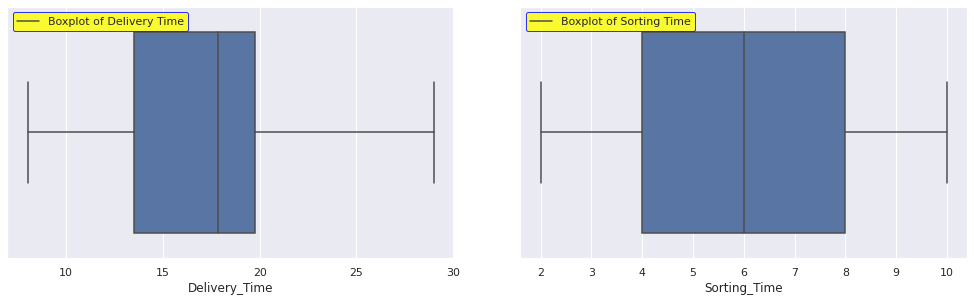

In [ ]:
# Using boxplots to detect outliers

sns.set(rc={"figure.figsize": (15,10)})

#creating first plot 

plt.subplot(2,2,1)
ax = sns.boxplot(x=input['Delivery_Time'])
plt.legend(['Boxplot of Delivery Time'],loc='upper left',facecolor='yellow',edgecolor='blue')

# Creating the second 

plt.subplot(2,2,2)
ax = sns.boxplot(x=input['Sorting_Time'])
plt.legend(["Boxplot of Sorting Time"],loc='upper left',facecolor='yellow',edgecolor='blue')

plt.tight_layout(5) 
plt.show()

No Outliers in delivery time and sorting time data

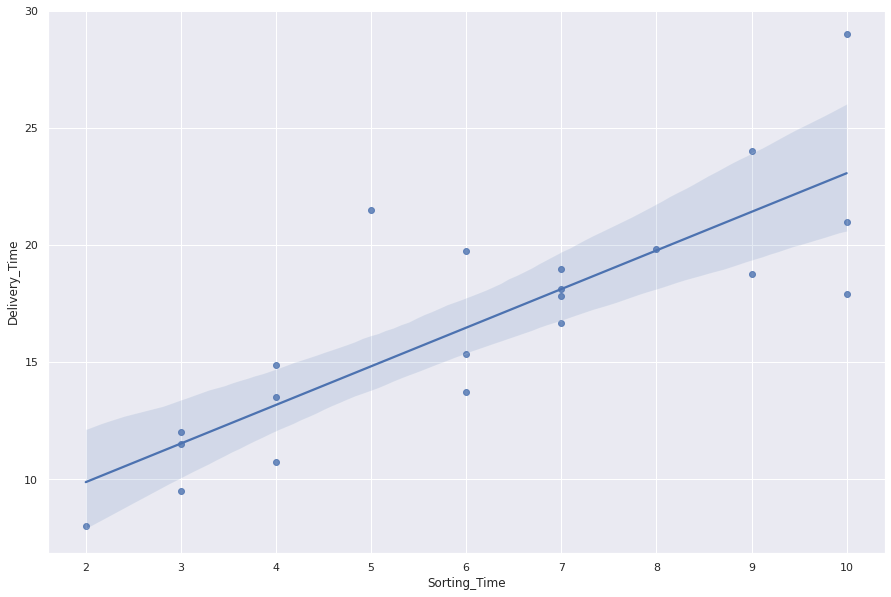

In [ ]:
# Using a scatter plot

sns.regplot(x="Sorting_Time", y="Delivery_Time", data=input)

In [ ]:
# Using correlation matrix
input.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


**Model 1- Using raw data without standardization and transformation**

In [ ]:
model_1=smf.ols('Delivery_Time ~ Sorting_Time',data=input).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 08 Aug 2022   Prob (F-statistic):           3.98e-06
Time:                        18:01:37   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Calculating RMSE for model 1

pred_data=model_1.predict(input['Sorting_Time'])
from ml_metrics import mse
rmse_1=np.sqrt(mse(input['Delivery_Time'],pred_data))
print("RMSE for first model is:",rmse_1)

RMSE for first model is: 2.7916503270617654


**Model 2- Using Standardization on input and output variable**

In [ ]:
# Converting the dataframe to an array and then using standardscaler() to standardize the values

from sklearn.preprocessing import StandardScaler
array_input=input.values
standard_input= StandardScaler().fit(array_input).transform(array_input)
standard_input[0:5]

array([[ 0.84986692,  1.53562462],
       [-0.66449036, -0.88298415],
       [ 0.59747404, -0.07678123],
       [ 1.45560983,  1.13252315],
       [ 2.46518134,  1.53562462]])

In [ ]:
# separating the array into X and Y before fitting using OLS

import statsmodels.api as sm
X=standard_input[:,1]
Y=standard_input[:,0]
model_2=sm.OLS(Y,X).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.682
Model:                            OLS   Adj. R-squared (uncentered):              0.666
Method:                 Least Squares   F-statistic:                              42.95
Date:                Mon, 08 Aug 2022   Prob (F-statistic):                    2.19e-06
Time:                        18:03:21   Log-Likelihood:                         -17.759
No. Observations:                  21   AIC:                                      37.52
Df Residuals:                      20   BIC:                                      38.56
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8260      0.126      6.553      0.000       0.563       1.089
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Calculating RMSE for model 2

pred_2=model_2.predict(X)
rmse_2=np.sqrt(mse(Y,pred_2))
print("RMSE for second model is:",rmse_2)

RMSE for second model is: 0.563674130290079


**Model 3- Using transformation on y**

In [ ]:
input2=input.copy()
input2['Log_DeliveryTime']=np.log(input2['Delivery_Time'])
input2.head()

,Delivery_Time,Sorting_Time,Log_DeliveryTime
0,21.00,10,3.044522
1,13.50,4,2.602690
2,19.75,6,2.983153
3,24.00,9,3.178054
4,29.00,10,3.367296


In [ ]:
# Checking the correlation betweeen transformed output variable and input variable

input2['Sorting_Time'].corr(input2['Log_DeliveryTime'])

0.8431772637224149

In [ ]:
model_3=smf.ols('Log_DeliveryTime~Sorting_Time',data=input2).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Log_DeliveryTime   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Mon, 08 Aug 2022   Prob (F-statistic):           1.59e-06
Time:                        18:06:39   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Calculating RMSE for model 3

pred_3=model_3.predict(input2['Sorting_Time'])
rmse_3=np.sqrt(mse(input2['Log_DeliveryTime'],pred_3))
print("RMSE for third model is:",rmse_3)

RMSE for third model is: 0.16696276106302863


**Model 4- Using Normalization on x and y**

In [ ]:
# Normalizing the dataset

from sklearn.preprocessing import MinMaxScaler
array_input=input.values
norm_input= MinMaxScaler().fit(array_input).transform(array_input)
norm_input[0:5]

array([[0.61904762, 1.        ],
       [0.26190476, 0.25      ],
       [0.55952381, 0.5       ],
       [0.76190476, 0.875     ],
       [1.        , 1.        ]])

In [ ]:
# Splitting ino X and Y 

X=norm_input[:,1]
Y=norm_input[:,0]
model_4=sm.OLS(Y,X).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.914
Model:                            OLS   Adj. R-squared (uncentered):              0.910
Method:                 Least Squares   F-statistic:                              213.7
Date:                Mon, 08 Aug 2022   Prob (F-statistic):                    3.86e-12
Time:                        18:08:56   Log-Likelihood:                          11.409
No. Observations:                  21   AIC:                                     -20.82
Df Residuals:                      20   BIC:                                     -19.77
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7548      0.052     14.620      0.000       0.647       0.863
==============================================================================
Omnibus:                        1.543   Durbin-Watson:                   1.211
Prob(Omnibus):                  0.462   Jarque-Bera (JB):                0.423
Skew:                           0.259   Prob(JB):                        0.809
Kurtosis:                       3.465   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Calculating RMSE for model 4

pred_4=model_4.predict(X)
rmse_4=np.sqrt(mse(Y,pred_4))
print("RMSE for fourth model is:",rmse_4)

RMSE for fourth model is: 0.14054714818280667


In [ ]:
result_input=pd.DataFrame({'Models':['Raw data','Standardization','Transformation on y','Normalization'],'R values':[0.682,0.682,0.711,0.914],
                        'RMSE':[rmse_1,rmse_2,rmse_3,rmse_4]})
result_input

,Models,R values,RMSE
0,Raw data,0.682,2.791650
1,Standardization,0.682,0.563674
2,Transformation on y,0.711,0.166963
3,Normalization,0.914,0.140547


**Model 4 (normalization) is the best model with highest R-squared value of 0.914 and RMSE of 0.14**